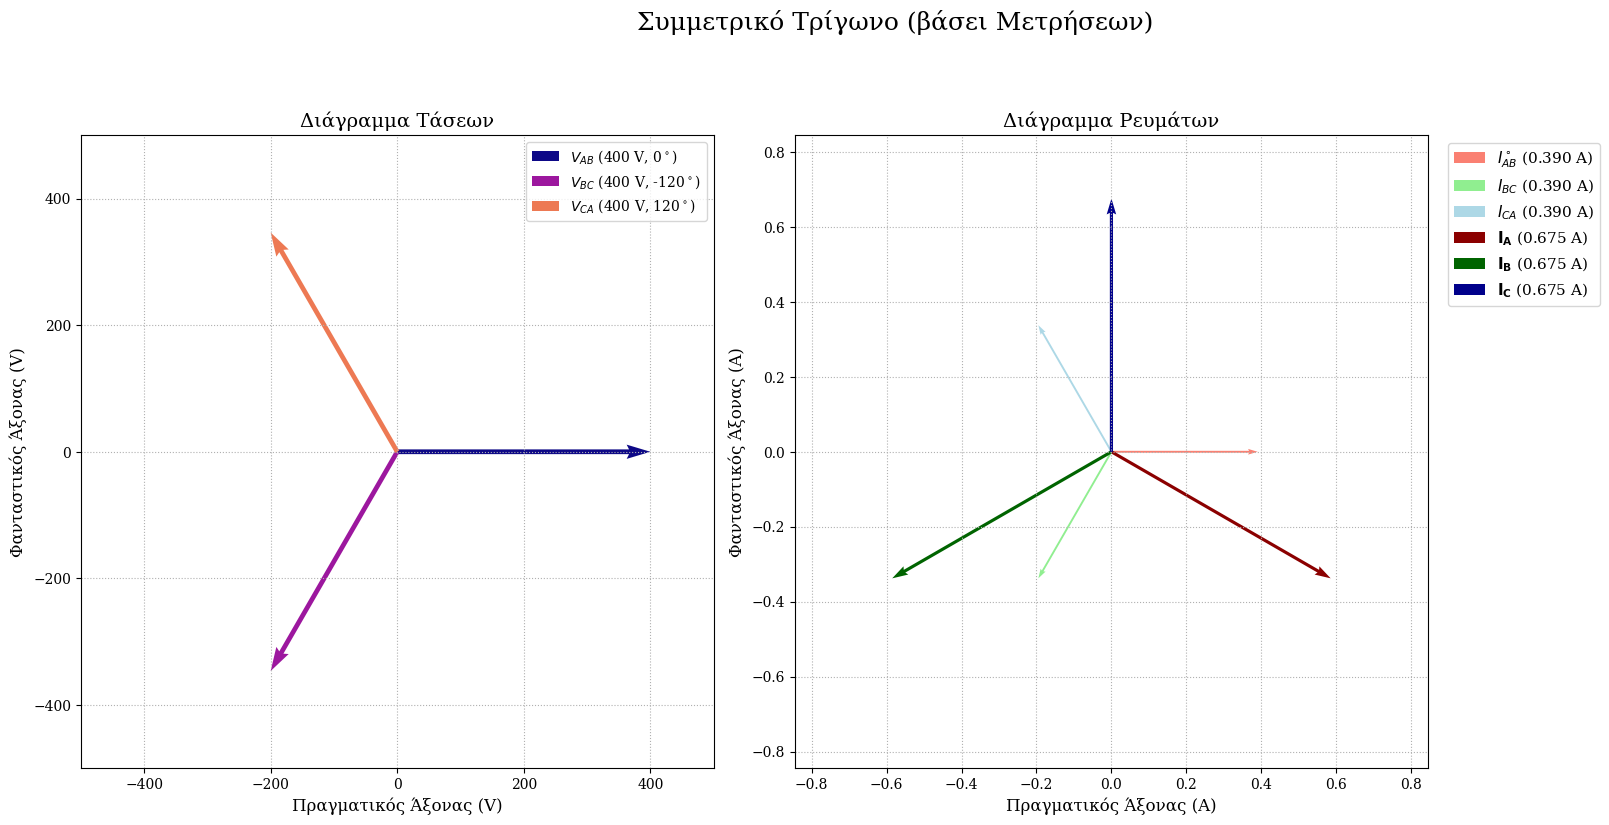

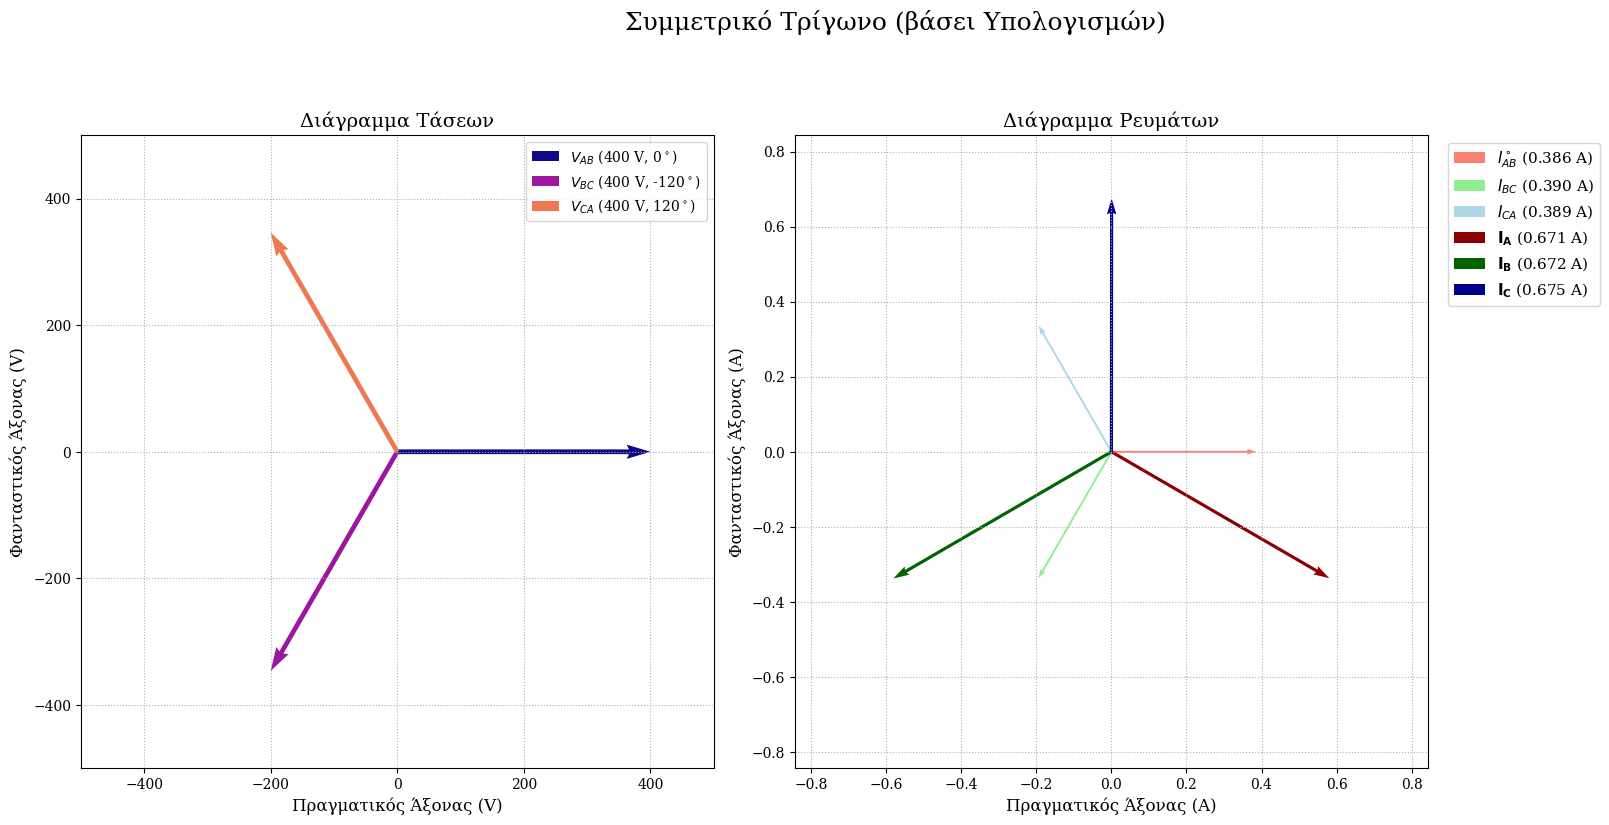

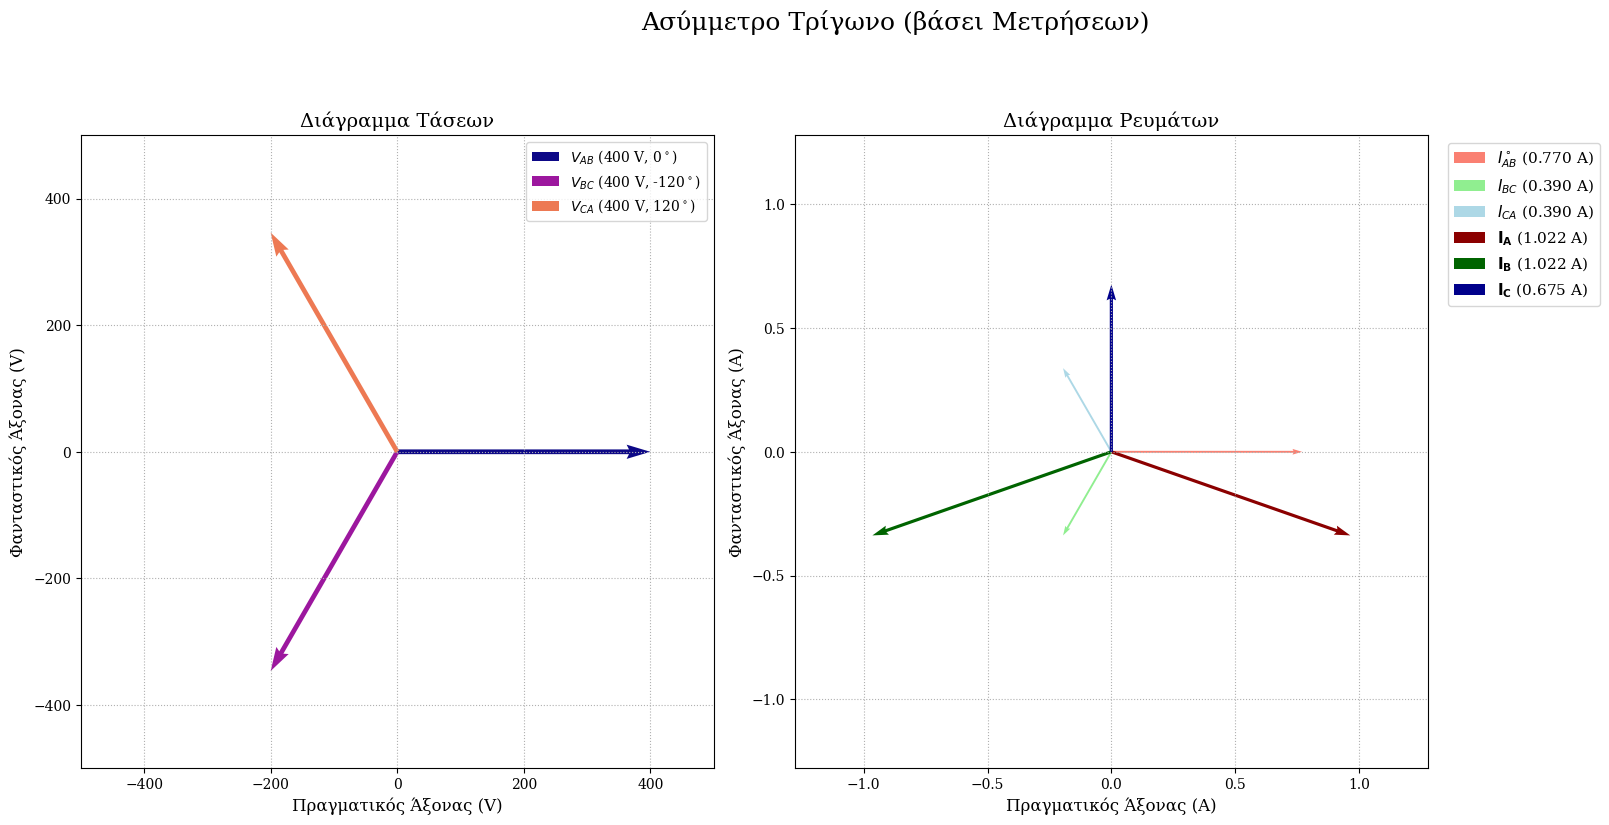

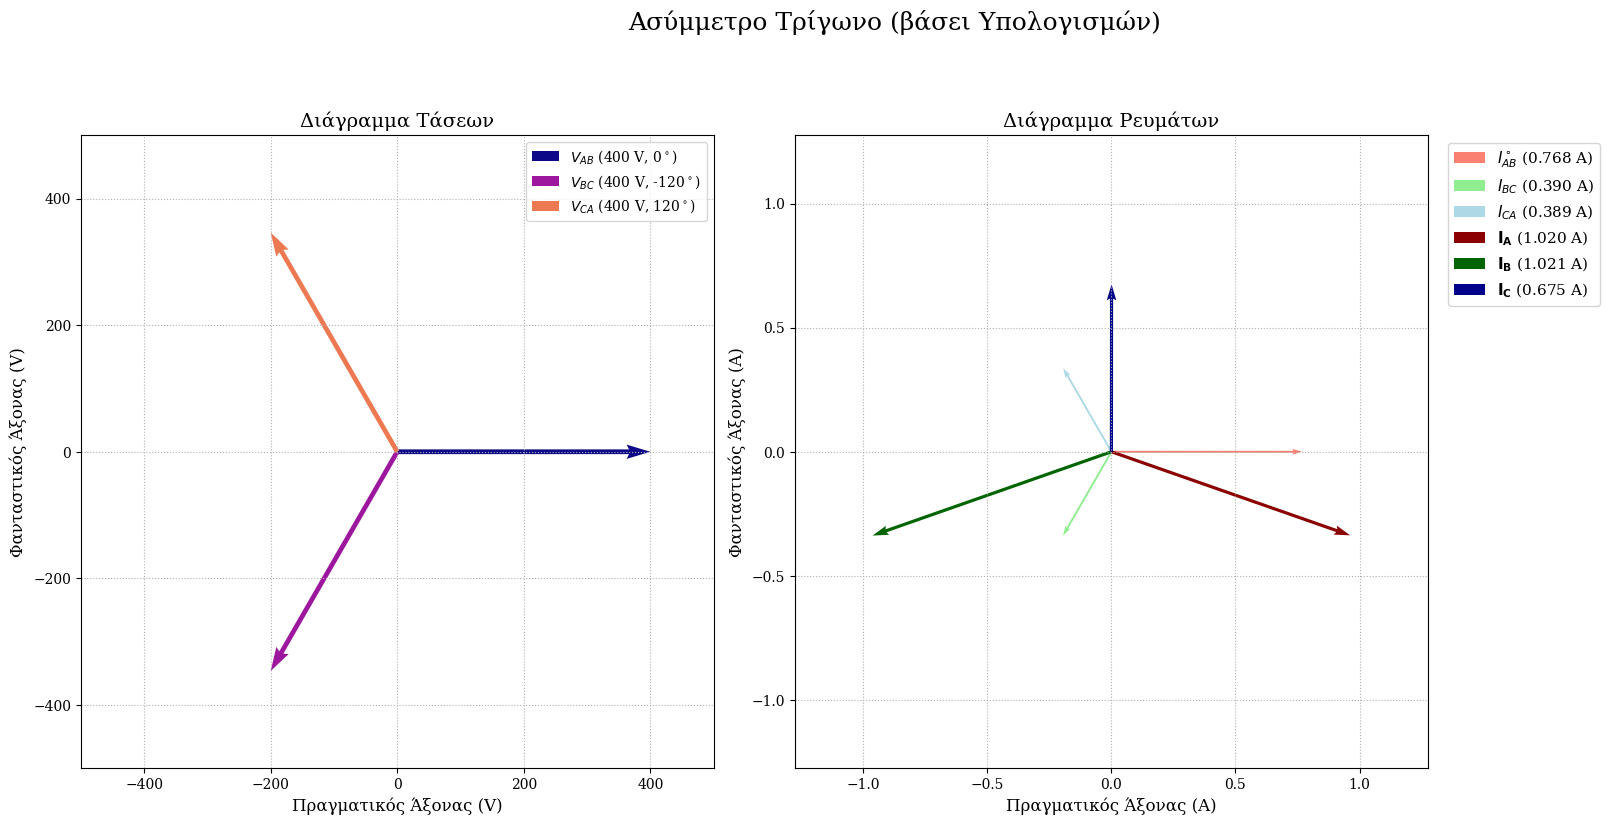

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set Greek fonts for labels if needed (works in Colab with this setup)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

# --- Helper function to create plots ---
def create_vector_diagrams(title, phase_currents, voltage_ref=400):
    """
    Generates and plots voltage and current vector diagrams.
    The line currents are calculated from the phase currents using KCL.
    """
    # --- Vector Definitions ---
    # Voltages
    V_ab = voltage_ref * np.exp(1j * np.deg2rad(0))
    V_bc = voltage_ref * np.exp(1j * np.deg2rad(-120))
    V_ca = voltage_ref * np.exp(1j * np.deg2rad(120))
    voltages = {'$V_{AB}$': V_ab, '$V_{BC}$': V_bc, '$V_{CA}$': V_ca}

    # Phase Currents
    i_ab = phase_currents['ab'] * np.exp(1j * np.deg2rad(0))
    i_bc = phase_currents['bc'] * np.exp(1j * np.deg2rad(-120))
    i_ca = phase_currents['ca'] * np.exp(1j * np.deg2rad(120))

    # KCL Calculation for Line Currents
    i_a = i_ab - i_ca
    i_b = i_bc - i_ab
    i_c = i_ca - i_bc

    # --- Plotting ---
    fig, (ax_v, ax_i) = plt.subplots(1, 2, figsize=(18, 8.5))
    fig.suptitle(title, fontsize=18, y=0.98)

    # 1. Voltage Diagram
    ax_v.set_title('Διάγραμμα Τάσεων', fontsize=14)
    ax_v.set_aspect('equal')
    ax_v.grid(True, linestyle=':')
    max_v = voltage_ref * 1.25
    ax_v.set_xlim([-max_v, max_v])
    ax_v.set_ylim([-max_v, max_v])
    ax_v.set_xlabel('Πραγματικός Άξονας (V)', fontsize=12)
    ax_v.set_ylabel('Φανταστικός Άξονας (V)', fontsize=12)
    for name, v in voltages.items():
        ax_v.quiver(0, 0, v.real, v.imag, angles='xy', scale_units='xy', scale=1,
                    color=plt.cm.plasma(list(voltages.keys()).index(name) / 3),
                    label=f'{name} ({abs(v):.0f} V, {np.angle(v, deg=True):.0f}$^\\circ$)')
    ax_v.legend()

    # 2. Current Diagram
    ax_i.set_title('Διάγραμμα Ρευμάτων', fontsize=14)
    ax_i.set_aspect('equal')
    ax_i.grid(True, linestyle=':')
    max_i = max(abs(i_a), abs(i_b), abs(i_c), abs(i_ab)) * 1.25
    ax_i.set_xlim([-max_i, max_i])
    ax_i.set_ylim([-max_i, max_i])
    ax_i.set_xlabel('Πραγματικός Άξονας (A)', fontsize=12)
    ax_i.set_ylabel('Φανταστικός Άξονας (A)', fontsize=12)

    # Plot Phase Currents (thin lines)
    ax_i.quiver(0,0, i_ab.real, i_ab.imag, angles='xy', scale_units='xy', scale=1, color='salmon', width=0.003, label=f'$I_{{AB}}$ ({abs(i_ab):.3f} A)')
    ax_i.quiver(0,0, i_bc.real, i_bc.imag, angles='xy', scale_units='xy', scale=1, color='lightgreen', width=0.003, label=f'$I_{{BC}}$ ({abs(i_bc):.3f} A)')
    ax_i.quiver(0,0, i_ca.real, i_ca.imag, angles='xy', scale_units='xy', scale=1, color='lightblue', width=0.003, label=f'$I_{{CA}}$ ({abs(i_ca):.3f} A)')

    # Plot Line Currents (thick lines)
    ax_i.quiver(0,0, i_a.real, i_a.imag, angles='xy', scale_units='xy', scale=1, color='darkred', width=0.005, label=f'$\\bf{{I_A}}$ ({abs(i_a):.3f} A)')
    ax_i.quiver(0,0, i_b.real, i_b.imag, angles='xy', scale_units='xy', scale=1, color='darkgreen', width=0.005, label=f'$\\bf{{I_B}}$ ({abs(i_b):.3f} A)')
    ax_i.quiver(0,0, i_c.real, i_c.imag, angles='xy', scale_units='xy', scale=1, color='darkblue', width=0.005, label=f'$\\bf{{I_C}}$ ({abs(i_c):.3f} A)')

    ax_i.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=11)
    plt.tight_layout(rect=[0, 0, 0.9, 0.94])
    plt.show()

# --- Data Definitions ---
# Case 1: Symmetrical - Measurements
currents_sym_meas = {'ab': 0.39, 'bc': 0.39, 'ca': 0.39}
create_vector_diagrams('Συμμετρικό Τρίγωνο (βάσει Μετρήσεων)', currents_sym_meas)

# Case 2: Symmetrical - Calculations
currents_sym_calc = {'ab': 0.386, 'bc': 0.390, 'ca': 0.389}
create_vector_diagrams('Συμμετρικό Τρίγωνο (βάσει Υπολογισμών)', currents_sym_calc)

# Case 3: Asymmetrical - Measurements
currents_asym_meas = {'ab': 0.77, 'bc': 0.39, 'ca': 0.39}
create_vector_diagrams('Ασύμμετρο Τρίγωνο (βάσει Μετρήσεων)', currents_asym_meas)

# Case 4: Asymmetrical - Calculations
currents_asym_calc = {'ab': 0.768, 'bc': 0.390, 'ca': 0.389}
create_vector_diagrams('Ασύμμετρο Τρίγωνο (βάσει Υπολογισμών)', currents_asym_calc)

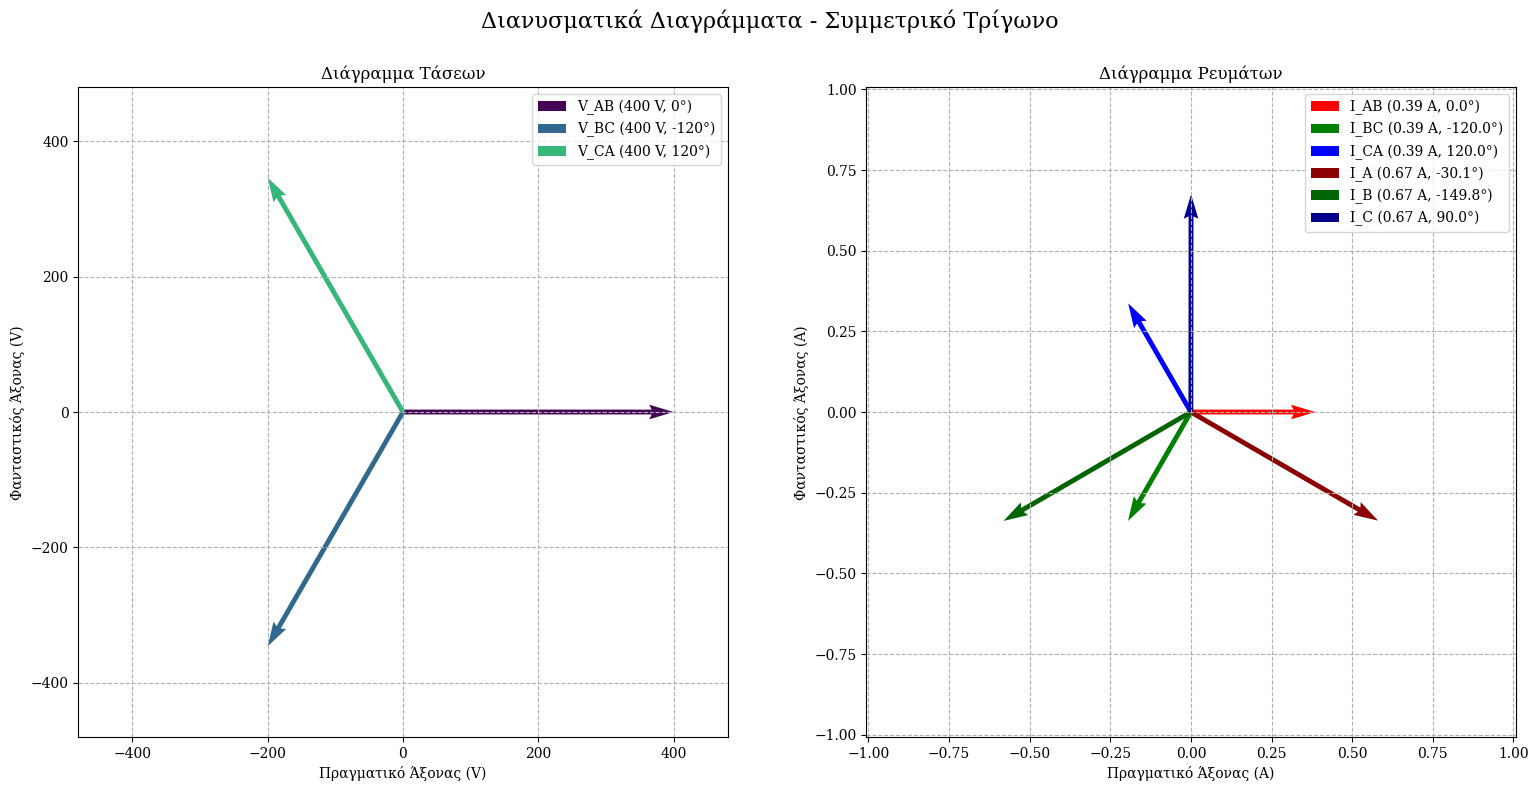

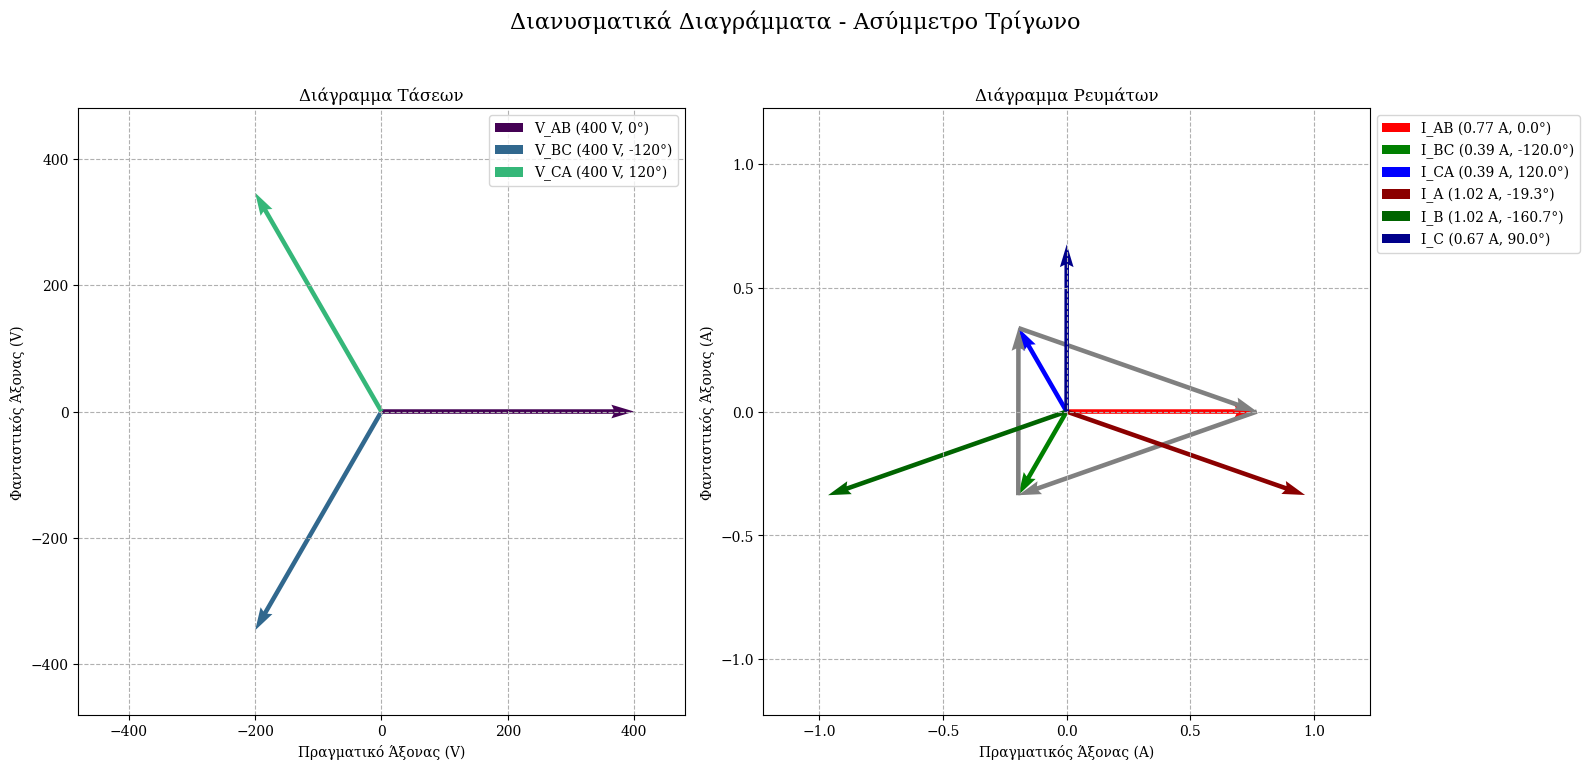

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set Greek fonts for labels
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['text.usetex'] = False

def plot_vector(vector, color, label, origin=np.complex128(0), linestyle='-'):
    """Helper function to plot a 2D vector using Matplotlib's quiver."""
    plt.quiver(origin.real, origin.imag, vector.real, vector.imag,
               angles='xy', scale_units='xy', scale=1, color=color,
               label=f'{label} ({abs(vector):.2f} A, {np.angle(vector, deg=True):.1f}°)')

def plot_construction_line(start, vector, color, linestyle='--'):
    """Helper function to plot construction lines for vector addition/subtraction."""
    plt.quiver(start.real, start.imag, vector.real, vector.imag,
               angles='xy', scale_units='xy', scale=1, color=color, linestyle=linestyle)

# --- Data from the tables (using "Υπολογισμοί" columns) ---

# Assume a reference line voltage, e.g., 400V. The exact value only affects the scale of the voltage plot.
V_L = 400

# Symmetrical Case Currents (Amps)
I_AB_sym = 0.386
I_BC_sym = 0.390
I_CA_sym = 0.389

# Asymmetrical Case Currents (Amps)
I_AB_asym = 0.768
I_BC_asym = 0.390  # Same as symmetrical
I_CA_asym = 0.389  # Same as symmetrical

# --- Vector Definitions ---

# Voltages (same for both cases)
# Vab is the reference at 0 degrees.
V_ab = V_L * np.exp(1j * np.deg2rad(0))
V_bc = V_L * np.exp(1j * np.deg2rad(-120))
V_ca = V_L * np.exp(1j * np.deg2rad(120))
voltages = {'V_AB': V_ab, 'V_BC': V_bc, 'V_CA': V_ca}

# Symmetrical Case Vectors
i_ab_sym = I_AB_sym * np.exp(1j * np.deg2rad(0))
i_bc_sym = I_BC_sym * np.exp(1j * np.deg2rad(-120))
i_ca_sym = I_CA_sym * np.exp(1j * np.deg2rad(120))

# Line currents are calculated using KCL
i_a_sym = i_ab_sym - i_ca_sym
i_b_sym = i_bc_sym - i_ab_sym
i_c_sym = i_ca_sym - i_bc_sym

# Asymmetrical Case Vectors
i_ab_asym = I_AB_asym * np.exp(1j * np.deg2rad(0))
i_bc_asym = I_BC_asym * np.exp(1j * np.deg2rad(-120))
i_ca_asym = I_CA_asym * np.exp(1j * np.deg2rad(120))

# Line currents are calculated using KCL
i_a_asym = i_ab_asym - i_ca_asym
i_b_asym = i_bc_asym - i_ab_asym
i_c_asym = i_ca_asym - i_bc_asym


# --- Plotting Symmetrical Case ---
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig1.suptitle('Διανυσματικά Διαγράμματα - Συμμετρικό Τρίγωνο', fontsize=16)

# Plot Symmetrical Voltages
ax1.set_title('Διάγραμμα Τάσεων')
ax1.set_aspect('equal')
ax1.grid(True, linestyle='--')
max_v = V_L * 1.2
ax1.set_xlim([-max_v, max_v])
ax1.set_ylim([-max_v, max_v])
ax1.set_xlabel('Πραγματικό Άξονας (V)')
ax1.set_ylabel('Φανταστικός Άξονας (V)')
for name, v in voltages.items():
    ax1.quiver(0, 0, v.real, v.imag, angles='xy', scale_units='xy', scale=1,
               color=plt.cm.viridis(list(voltages.keys()).index(name) / 3),
               label=f'{name} ({abs(v):.0f} V, {np.angle(v, deg=True):.0f}°)')
ax1.legend()

# Plot Symmetrical Currents
ax2.set_title('Διάγραμμα Ρευμάτων')
ax2.set_aspect('equal')
ax2.grid(True, linestyle='--')
max_i_sym = abs(i_a_sym) * 1.5
ax2.set_xlim([-max_i_sym, max_i_sym])
ax2.set_ylim([-max_i_sym, max_i_sym])
ax2.set_xlabel('Πραγματικό Άξονας (A)')
ax2.set_ylabel('Φανταστικός Άξονας (A)')

# Phase Currents
plot_vector(i_ab_sym, 'red', 'I_AB')
plot_vector(i_bc_sym, 'green', 'I_BC')
plot_vector(i_ca_sym, 'blue', 'I_CA')

# Line Currents
plot_vector(i_a_sym, 'darkred', 'I_A')
plot_vector(i_b_sym, 'darkgreen', 'I_B')
plot_vector(i_c_sym, 'darkblue', 'I_C')

ax2.legend(loc='upper right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Plotting Asymmetrical Case ---
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 8))
fig2.suptitle('Διανυσματικά Διαγράμματα - Ασύμμετρο Τρίγωνο', fontsize=16)

# Plot Asymmetrical Voltages (same as symmetrical)
ax3.set_title('Διάγραμμα Τάσεων')
ax3.set_aspect('equal')
ax3.grid(True, linestyle='--')
ax3.set_xlim([-max_v, max_v])
ax3.set_ylim([-max_v, max_v])
ax3.set_xlabel('Πραγματικό Άξονας (V)')
ax3.set_ylabel('Φανταστικός Άξονας (V)')
for name, v in voltages.items():
    ax3.quiver(0, 0, v.real, v.imag, angles='xy', scale_units='xy', scale=1,
               color=plt.cm.viridis(list(voltages.keys()).index(name) / 3),
               label=f'{name} ({abs(v):.0f} V, {np.angle(v, deg=True):.0f}°)')
ax3.legend()

# Plot Asymmetrical Currents
ax4.set_title('Διάγραμμα Ρευμάτων')
ax4.set_aspect('equal')
ax4.grid(True, linestyle='--')
max_i_asym = abs(i_a_asym) * 1.2
ax4.set_xlim([-max_i_asym, max_i_asym])
ax4.set_ylim([-max_i_asym, max_i_asym])
ax4.set_xlabel('Πραγματικός Άξονας (A)')
ax4.set_ylabel('Φανταστικός Άξονας (A)')

# Phase Currents
plot_vector(i_ab_asym, 'red', 'I_AB')
plot_vector(i_bc_asym, 'green', 'I_BC')
plot_vector(i_ca_asym, 'blue', 'I_CA')

# Show KCL construction for Line Currents
# I_A = I_AB - I_CA
plot_construction_line(i_ca_asym, i_a_asym, 'gray') # I_A = I_AB - I_CA => I_AB = I_A + I_CA
# I_B = I_BC - I_AB
plot_construction_line(i_ab_asym, i_b_asym, 'gray') # I_B = I_BC - I_AB => I_BC = I_B + I_AB
# I_C = I_CA - I_BC
plot_construction_line(i_bc_asym, i_c_asym, 'gray') # I_C = I_CA - I_BC => I_CA = I_C + I_BC

# Line Currents
plot_vector(i_a_asym, 'darkred', 'I_A')
plot_vector(i_b_asym, 'darkgreen', 'I_B')
plot_vector(i_c_asym, 'darkblue', 'I_C')


ax4.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()